# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(pd.unique(merge_data["Mouse ID"]))

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merge_data.loc[merge_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]["Mouse ID"].unique()
duplicated_mice



array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_data = [merge_data.loc[merge_data["Mouse ID"] == mouse] for mouse in duplicated_mice]
dupe_data

[    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
 908     g989     Propriva  Female          21          26          0   
 909     g989     Propriva  Female          21          26          0   
 910     g989     Propriva  Female          21          26          5   
 911     g989     Propriva  Female          21          26          5   
 912     g989     Propriva  Female          21          26         10   
 913     g989     Propriva  Female          21          26         10   
 914     g989     Propriva  Female          21          26         15   
 915     g989     Propriva  Female          21          26         15   
 916     g989     Propriva  Female          21          26         20   
 917     g989     Propriva  Female          21          26         20   
 918     g989     Propriva  Female          21          26         25   
 919     g989     Propriva  Female          21          26         30   
 920     g989     Propriva  Female          21     

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_data_clean = merge_data[merge_data["Mouse ID"] != duplicated_mice[0]]
merge_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(merge_data_clean["Mouse ID"]))

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_groups = merge_data_clean.groupby("Drug Regimen")

regimen_means = regimen_groups["Tumor Volume (mm3)"].mean()
regimen_medians = regimen_groups["Tumor Volume (mm3)"].median()
regimen_variances = regimen_groups["Tumor Volume (mm3)"].var()
regimen_sds = regimen_groups["Tumor Volume (mm3)"].std()
regimen_sems = regimen_groups["Tumor Volume (mm3)"].sem()
regimen_df = pd.DataFrame({"Mean Tumor Volume": regimen_means,
                            "Median Tumor Volume": regimen_medians,
                            "Tumor Volume Variance": regimen_variances,
                            "Tumor Volume Std. Dev.": regimen_sds,
                            "Tumor Volume Std. Err": regimen_sems})
regimen_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_df_aggregation = regimen_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_df_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Data Points')

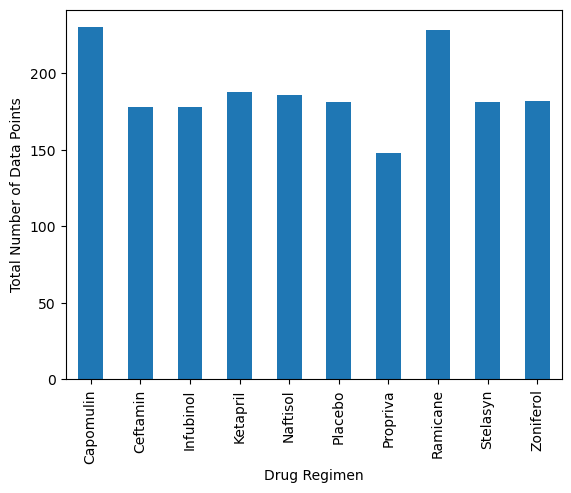

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_timepoints_counts = regimen_groups.size()
regimen_timepoints_counts.plot.bar()
plt.ylabel("Total Number of Data Points")

Text(0, 0.5, 'Total Number of Data Points')

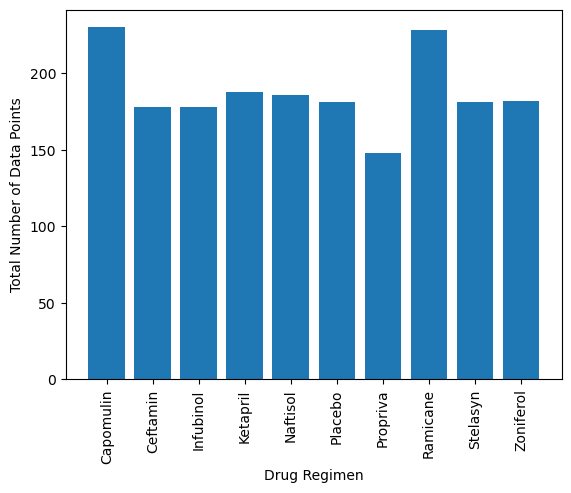

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_timepoints_counts.index, regimen_timepoints_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Data Points")


<Axes: ylabel='Sex'>

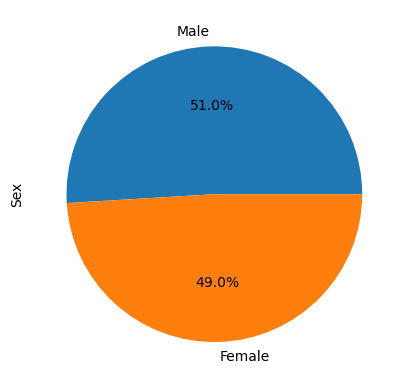

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_data = merge_data_clean["Sex"].value_counts()
mouse_sex_data.plot.pie(autopct="%1.1f%%")

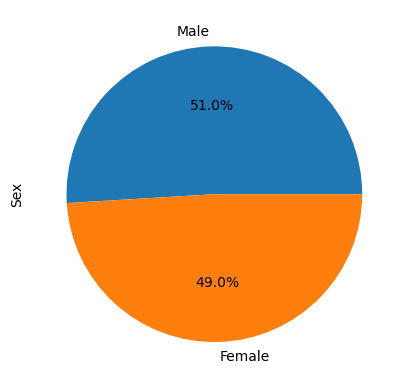

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex_data.values, labels=mouse_sex_data.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

drug_group = merge_data_clean.loc[(merge_data_clean["Drug Regimen"] == "Capomulin") |
                                                (merge_data_clean["Drug Regimen"] == "Ramicane") |
                                                (merge_data_clean["Drug Regimen"] == "Infubinol") |
                                                (merge_data_clean["Drug Regimen"] == "Ceftamin")]
greatest_timepoint_per_mouse = drug_group.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes_df = pd.merge(drug_group, greatest_timepoint_per_mouse, on="Mouse ID")
final_tumor_volumes_df
# = final_tumor_volumes.loc[final_tumor_volumes["Timepoint_x"] == final_tumor_volumes["Timepoint_y"]]
# final_tumor_volumes = final_tumor_volumes.set_index("Mouse ID")["Tumor Volume (mm3)"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,45
810,z581,Infubinol,Female,24,25,30,56.286750,2,45
811,z581,Infubinol,Female,24,25,35,58.628399,3,45
812,z581,Infubinol,Female,24,25,40,60.053740,3,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volumes_df.loc[final_tumor_volumes_df["Drug Regimen"] == treatment]
    treatment_data_list = treatment_data.loc[treatment_data["Timepoint_x"] == treatment_data["Timepoint_y"]]["Tumor Volume (mm3)"]
    # add subset 
    tumor_volume_data.append(treatment_data_list)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data_list.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_list = treatment_data.loc[(treatment_data["Timepoint_x"] == treatment_data["Timepoint_y"]) & 
                                        ((treatment_data["Tumor Volume (mm3)"] > upper_bound) | 
                                        (treatment_data["Tumor Volume (mm3)"] < lower_bound))]
    for i in range(len(outliers_list)):
        print(outliers_list.iloc[:,0])


526    c326
Name: Mouse ID, dtype: object


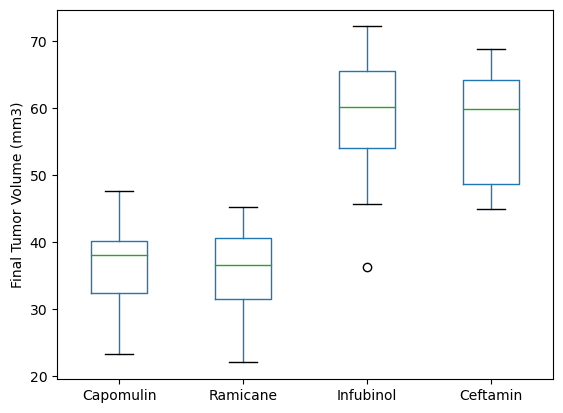

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df = pd.DataFrame()
for data in tumor_volume_data:
    df = pd.concat([df,data], axis=1)

df.boxplot()
tick_locations = np.arange(len(treatments)) + 1
plt.xticks(tick_locations, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.grid(False)

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

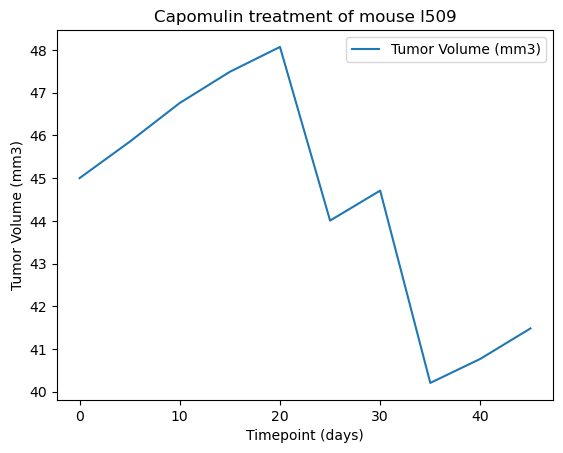

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_ID = "l509"
one_mouse_data = merge_data_clean.loc[merge_data_clean["Mouse ID"] == mouse_ID]
one_mouse_data.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_ID}")

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

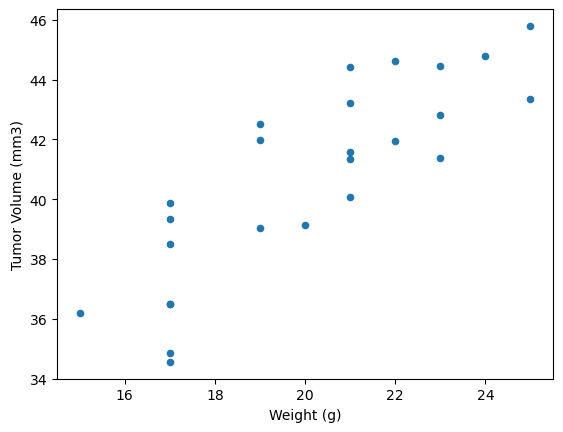

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merge_data_clean.loc[merge_data_clean["Drug Regimen"] == "Capomulin"]
capomulin_avgs = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].unique()

data_to_graph = pd.merge(capomulin_avgs, capomulin_weights, on="Mouse ID")
data_to_graph.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is [0.84].


(33.997152089375, 46.360960813125)

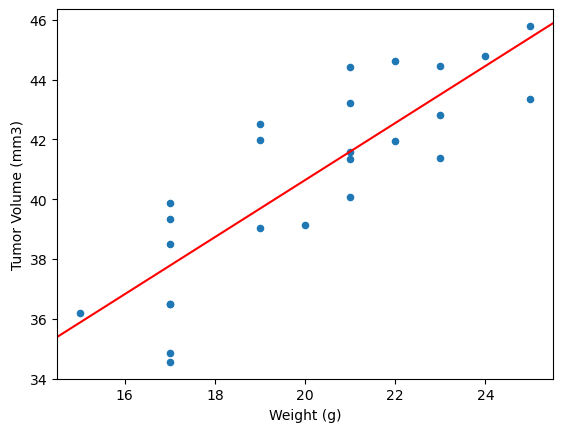

In [44]:
correlation_coeff = st.pearsonr(capomulin_weights, capomulin_avgs)
print(f"The correlation between mouse weight and the average tumor volume is {np.round(correlation_coeff[0],2)}.")

x_values = capomulin_weights.astype(float)
y_values = capomulin_avgs
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
data_to_graph.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)")
(x_min, x_max) = plt.xlim()
(y_min,y_max) = plt.ylim()
plt.axline((0,intercept), slope=slope, color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)


The correlation between mouse weight and the average tumor volume is 0.84


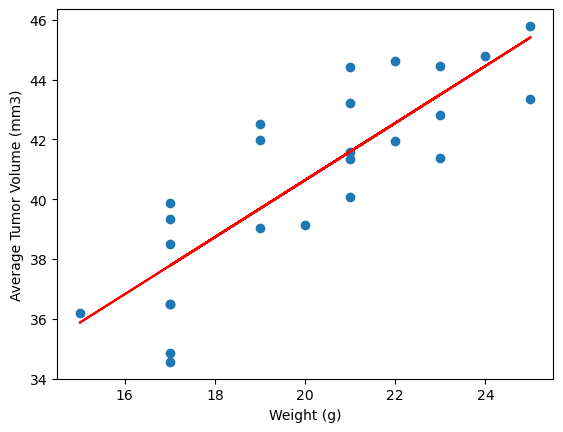

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
